In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_excel("Airlines+Data.xlsx")

In [3]:
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
96/12

8.0

We have annual data over 8 years of the no of passengers

<AxesSubplot:xlabel='Month'>

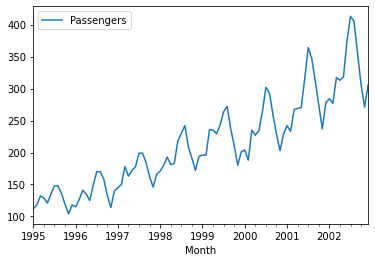

In [5]:
series = pd.read_excel("Airlines+Data.xlsx",index_col=0,parse_dates=True)
series.plot()

From this plot it is clear that there is an increasing trend in number of passengers over the years

<AxesSubplot:ylabel='Density'>

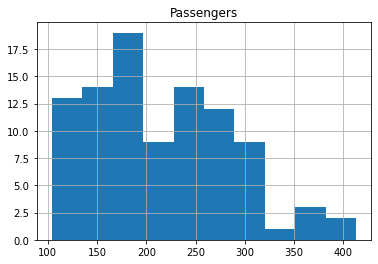

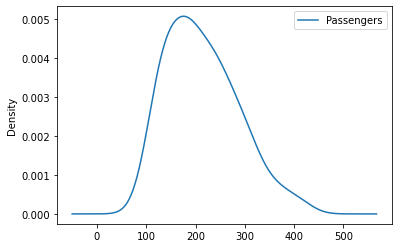

In [6]:
series = pd.read_excel("Airlines+Data.xlsx", header=0, index_col=0,parse_dates=True)
series.hist()
series.plot(kind='kde')

Since there is increase in trend , hence histogram does not capture exact information

In [7]:
groups=series.groupby(pd.Grouper(freq='A'))

In [8]:
df_year = pd.DataFrame()
for name,gr in groups:
    df_year[name.year]=list(gr.values.flatten())

In [9]:
df_year

,1995,1996,1997,1998,1999,2000,2001,2002
0,112,115,145,171,196,204,242,284
1,118,126,150,180,196,188,233,277
2,132,141,178,193,236,235,267,317
3,129,135,163,181,235,227,269,313
4,121,125,172,183,229,234,270,318
5,135,149,178,218,243,264,315,374
6,148,170,199,230,264,302,364,413
7,148,170,199,242,272,293,347,405
8,136,158,184,209,237,259,312,355
9,119,133,162,191,211,229,274,306


<AxesSubplot:>

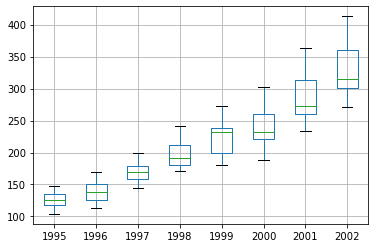

In [10]:
df_year.boxplot()

In any particular year we see that, there is no drastic increase or decrease in no of passengers i.e no outliers

In [11]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 12)'>

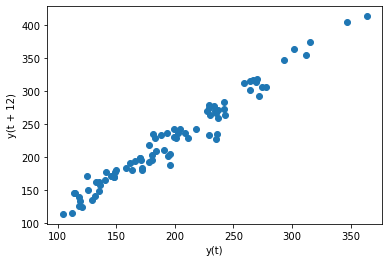

In [12]:
lag_plot(series,lag=12)

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

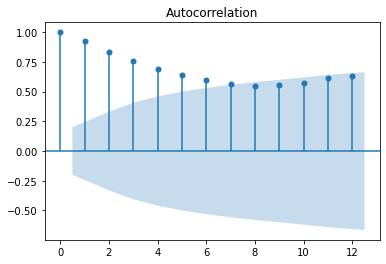

In [14]:
pl=plot_acf(series,lags=12)

## Splitting of data 

In [15]:
len(series)/12

8.0

In [16]:
train = series.head(12*7)
test = series.tail(12)

## Smoothening techniques

### Moving Average

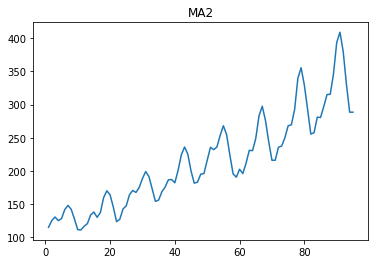

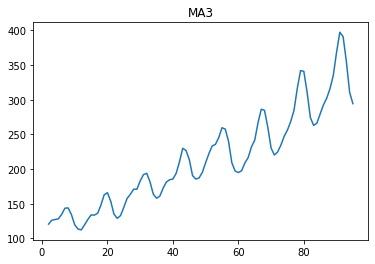

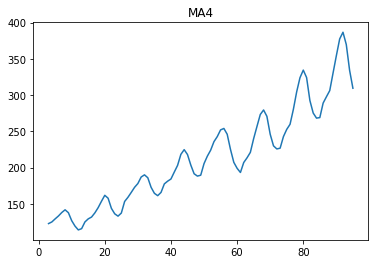

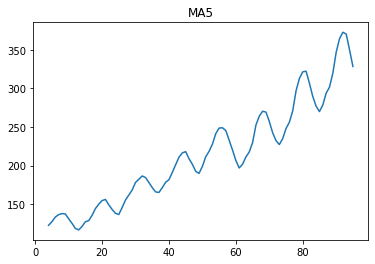

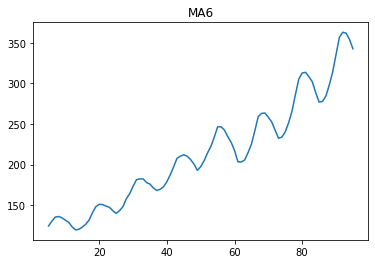

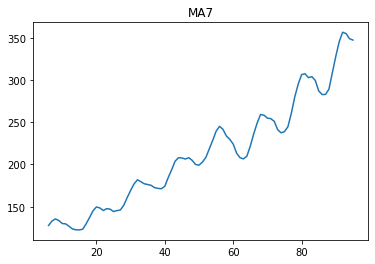

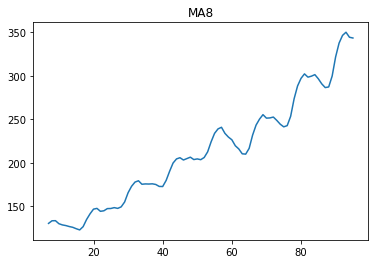

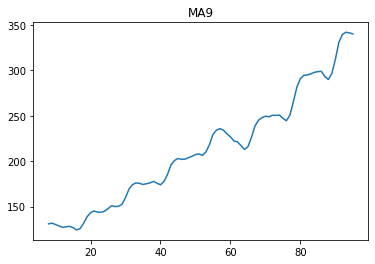

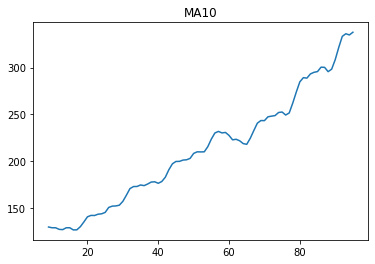

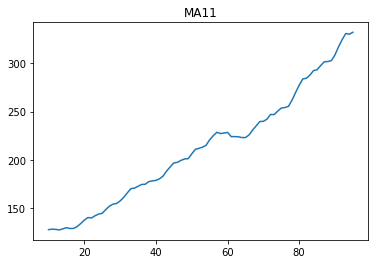

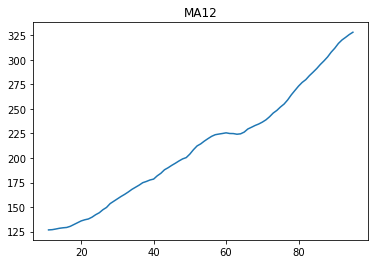

In [17]:
for i in range(2,13):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("MA"+str(i))
    plt.show()

### Time series decomposition

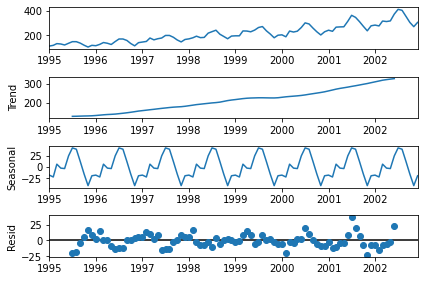

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
sd=seasonal_decompose(series,period=12)
sd.plot()
plt.show()

### ACF and PACF plots

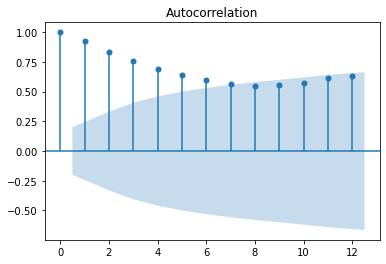

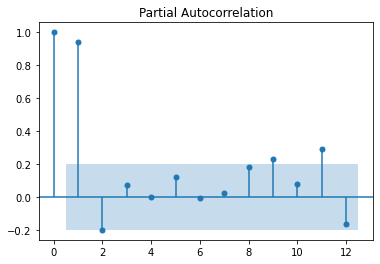

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf=plot_acf(series,lags=12)
pacf = plot_pacf(series,lags=12)

In Partial autocorrelation plot we see that beyond the very next month there is not much relation with no of passengers in coming months 

## Different Models

### Simple Exponential Smoothening

In [20]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error as mse

In [21]:
ses=SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred=ses.predict(start=test.index[0],end=test.index[-1])
pow(mse(test.Passengers,pred),0.5)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


64.84476396990442

Using simple exponential smoothening we see that the root mean square error is quite high

### Holt method

In [22]:
from statsmodels.tsa.holtwinters import Holt

In [23]:
holt_model= Holt(train["Passengers"]).fit(smoothing_level=0.99,smoothing_trend=0.1)
pred=holt_model.predict(start=test.index[0],end=test.index[-1])
pow(mse(test.Passengers,pred),0.5)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


64.89160377387428

### Holt winters additive seasonality and additive trend

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [25]:
holt_double = ExponentialSmoothing(train.Passengers,seasonal='add',trend='add',seasonal_periods=12).fit()
pred=holt_double.predict(start=test.index[0],end=test.index[-1])
pow(mse(test.Passengers,pred),0.5)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


28.875150286838977

### Holt winters multiplicative seasonality and additive trend

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from math import sqrt

In [27]:
holt_triple=ExponentialSmoothing(train.Passengers,seasonal='mul',trend='add',seasonal_periods=12).fit()
pred=holt_triple.predict(start=test.index[0],end=test.index[-1])
sqrt(mse(test.Passengers,pred))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


12.92065172601387

With multiplicative seasonality we get best results

### Naive model ( keeping prediction of today's no. of passengers as yesterdays no. of passengers)

In [28]:
history = [x for x in train.Passengers]
pred = []
for i in range(len(test)):
    pred.append(history[-1])
    history.append(test.Passengers[i])
sqrt(mse(list(test.Passengers.values),pred))

33.909192460648974

### ARIMA Model

In [29]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [30]:
def arima(val,orde):
    history = [x for x in train.Passengers]
    pred=[]
    val = list(val)
    for i in range(len(val)):
        arim_model=ARIMA(history,order=orde).fit()
        forecast = arim_model.forecast()[0]
        history.append(val[i])
        pred.append(forecast)
    rmse=sqrt(mse(val,pred))   
    return rmse
    

In [31]:
brmse = 1000
for p in range(5):
    for d in range(5):
        for q in range(5):
            order=(p,d,q)
            try:
                arima_v=arima(test["Passengers"],order)
                if arima_v<brmse:
                    brmse = arima_v
                    bord= order
            except:
                continue
            print(order," Root mean square error is: ",arima_v)

print("="*10)
print(bord," Best Root mean square error is: ",brmse)


(0, 0, 1)  Root mean square error is:  69.55304180474666
(0, 1, 1)  Root mean square error is:  30.908316344634706
(0, 1, 2)  Root mean square error is:  35.309932097931046
(0, 1, 3)  Root mean square error is:  30.01107834104889
(0, 1, 4)  Root mean square error is:  26.94951486319381
(0, 2, 1)  Root mean square error is:  34.72195967805854
(0, 2, 2)  Root mean square error is:  31.370129338285057
(0, 2, 3)  Root mean square error is:  31.490128825027973
(0, 2, 4)  Root mean square error is:  29.487751968373182
(1, 0, 0)  Root mean square error is:  34.55159765516968
(1, 0, 1)  Root mean square error is:  31.13352692015994
(1, 0, 2)  Root mean square error is:  31.013635738433198
(1, 1, 0)  Root mean square error is:  32.27346704387056
(1, 1, 1)  Root mean square error is:  34.57127422122196
(1, 1, 2)  Root mean square error is:  28.493008516795893
(1, 2, 0)  Root mean square error is:  38.80247007213518
(2, 0, 0)  Root mean square error is:  32.54823820136105
(2, 0, 1)  Root mean squ

We see that we ARIMA model of order (0,1,4) we get best results with minimum rmse score of 26.94

## Creating the best ARIMA model

In [33]:
history = [x for x in train.Passengers]
pred=[]
val = list(test.Passengers)
for i in range(len(val)):
        arim_model=ARIMA(history,order=(0,1,4)).fit()
        forecast = arim_model.forecast()[0]
        history.append(val[i])
        pred.append(forecast)

Text(0, 0.5, 'No of passengers')

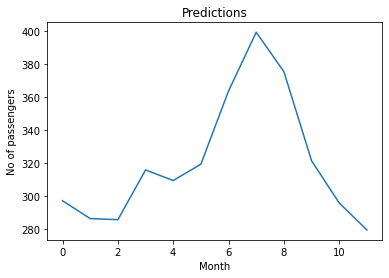

In [45]:
plt.plot(pred)
plt.title("Predictions")
plt.xlabel("Month")
plt.ylabel("No of passengers")

Text(0, 0.5, 'No of passengers')

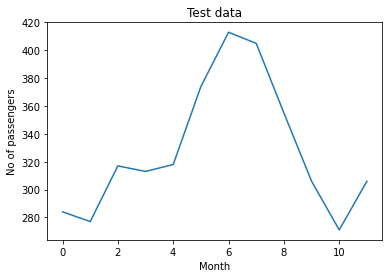

In [46]:
plt.plot(val)
plt.title("Test data")
plt.xlabel("Month")
plt.ylabel("No of passengers")

Both the predictions and test data graphs look more or less similiar